In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv('/content/manufacturing.csv')
dataset.head()

Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [5]:
dataset.describe

<bound method NDFrame.describe of       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           209.762701        8.050855             1688.769167   
1           243.037873       15.812068             3842.931469   
2           220.552675        7.843130             1729.823314   
3           208.976637       23.786089             4970.736918   
4           184.730960       15.797812             2918.345014   
...                ...             ...                     ...   
3952        156.811578       21.794290             3417.596965   
3953        197.850406        8.291704             1640.516924   
3954        241.357144       16.391910             3956.304672   
3955        209.040239       23.809936             4977.234763   
3956        163.359996       24.332133             3974.897121   

      Material Fusion Metric  Material Transformation Metric  Quality Rating  
0               44522.217074                    9.229576e+06       99.999971  
1               63020.764997                    1.435537e+07       99.985703  
2               49125.950249                    1.072839e+07       99.999758  
3               57128.881547                    9.125702e+06       99.999975  
4               38068.201283                    6.303792e+06      100.000000  
...                      ...                             ...             ...  
3952            34941.963896                    3.855501e+06      100.000000  
3953            39714.857236                    7.744742e+06       99.999997  
3954            62657.690952                    1.405957e+07       99.989318  
3955            57195.985528                    9.134036e+06       99.999975  
3956            41092.392901                    4.358913e+06      100.000000  

[3957 rows x 6 columns]>

In [6]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train.shape

(2769, 5)

In [8]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = multi_regressor.predict(X_test)

In [10]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[ 2.47753514e-01 -5.80666859e-01  8.97388038e-04  5.76230813e-04
 -4.64813639e-06]
71.71899815217306


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [15]:
input_data = [[209.762701	,8.050855	,1688.769167,	44522.217074,	9.229576e+06]]

# Make predictions (ensure your model is already trained and loaded)
prediction = multi_regressor.predict(input_data)
print(f"Quality Rating  {prediction[0]}")


Quality Rating  103.28380639142344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.5077944610804634


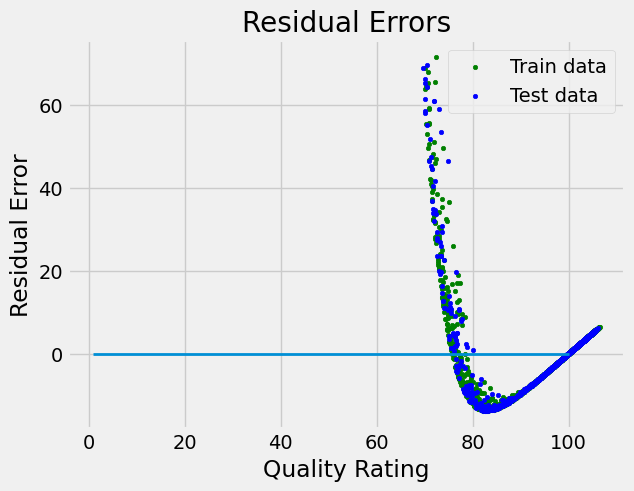

In [21]:
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined
plt.style.use('fivethirtyeight')

# Residual errors for training data
plt.scatter(
    multi_regressor.predict(X_train),
    multi_regressor.predict(X_train) - y_train,
    color="green",
    s=10,
    label="Train data"
)

# Residual errors for test data
plt.scatter(
    multi_regressor.predict(X_test),
    multi_regressor.predict(X_test) - y_test,
    color="blue",
    s=10,
    label="Test data"
)

# Horizontal line at y = 0
plt.hlines(y=0, xmin=min(y_train.min(), y_test.min()), xmax=max(y_train.max(), y_test.max()), linewidth=2)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.title("Residual Errors")
plt.xlabel("Quality Rating")
plt.ylabel("Residual Error")

# Show the plot
plt.show()


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5.683073887218504
MSE: 98.60365102445394
RMSE: 9.929937110800548


**POLYNOMIAL REGRESSION**

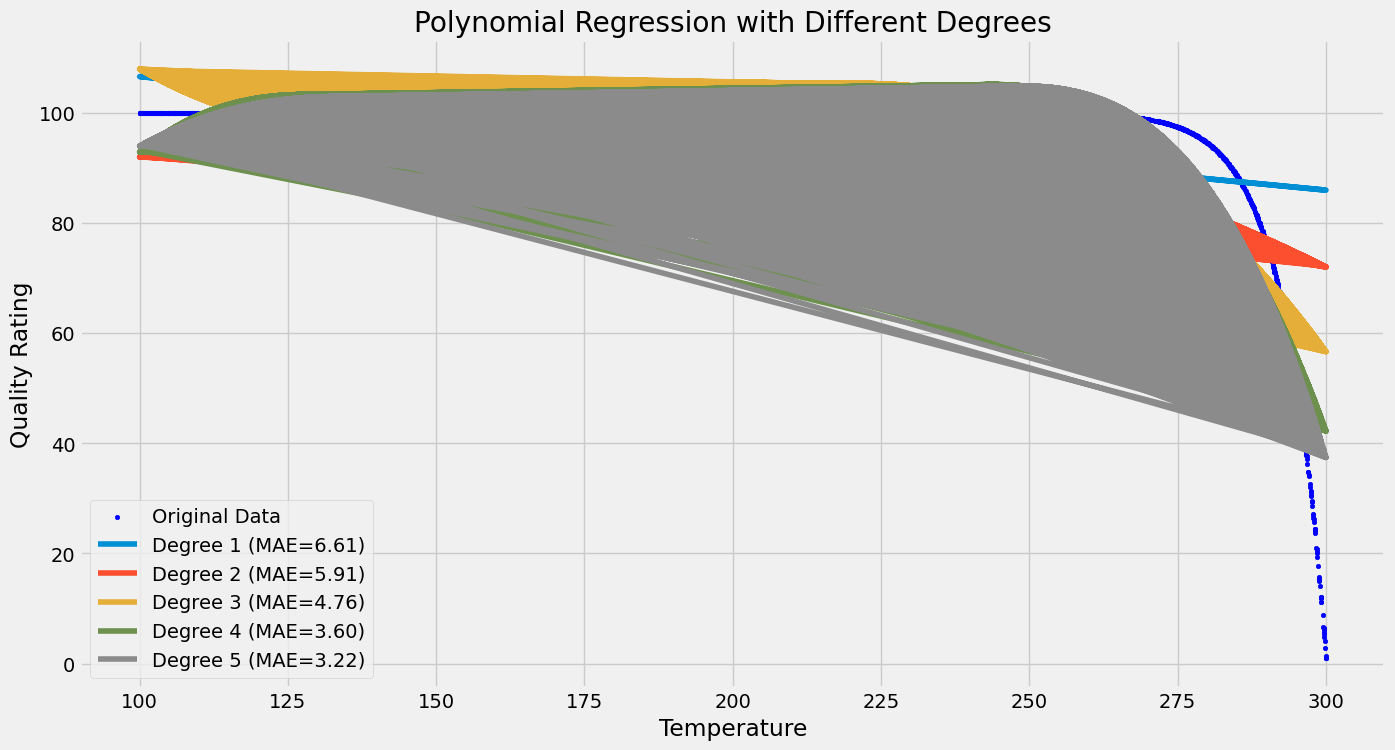

Degree       MAE         MSE       RMSE
0       1  6.611825  132.848636  11.525998
1       2  5.911418   90.907937   9.534565
2       3  4.764307   53.987709   7.347633
3       4  3.604893   28.613792   5.349186
4       5  3.218295   22.162454   4.707702

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select target variable (y) and a sample predictor ('Temperature')
X = dataset[['Temperature (°C)']].values  # Predictor
y = dataset['Quality Rating'].values  # Target


degrees = [1, 2, 3, 4, 5]


mae_list = []
mse_list = []
rmse_list = []


plt.figure(figsize=(15, 8))
plt.scatter(X, y, color='blue', s=10, label='Original Data')

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)


    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)


    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)


    plt.plot(X, y_pred, label=f"Degree {degree} (MAE={mae:.2f})")


plt.title("Polynomial Regression with Different Degrees")
plt.xlabel("Temperature")
plt.ylabel("Quality Rating")
plt.legend()
plt.grid(True)
plt.show()

metrics_df = pd.DataFrame({
    "Degree": degrees,
    "MAE": mae_list,
    "MSE": mse_list,
    "RMSE": rmse_list
})
metrics_df
